1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

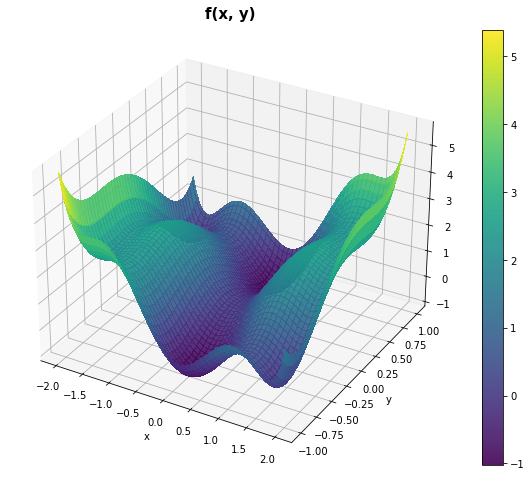

In [1]:
from scipy import optimize
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (4-2.1*x[0]**2+x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

## PLOT
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
x, y = np.meshgrid(x, y)
z = f([x, y])

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.viridis,  linewidth=0, antialiased=False, alpha=0.9)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.8)

# Labels
ax.set_title('f(x, y)', fontweight = 'bold', fontsize = 15)
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('f(x, y)')

plt.show()


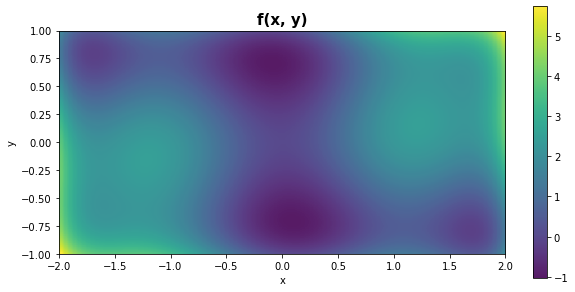

In [2]:
# FIND VISUALLY THE REGIONS 
plt.figure(figsize=(10, 5))
plt.imshow(z, extent=(-2, 2, -1, 1), cmap=cm.viridis, alpha=0.9, origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x, y)', fontweight = 'bold', fontsize = 15)

plt.colorbar();

In [3]:
import pandas as pd
from IPython.display import display

# LOCAL MINIMA
starting_guesses = [[-1.5, 0], [1.5, 0], [0, -1], [0, 1]]
solutions = [optimize.minimize(f, x0 = i) for i in starting_guesses]

min_loc = {'initial guess': starting_guesses, 
           'x':[solution['x'][0] for solution in solutions], 
           'y':[solution['x'][1] for solution in solutions], 
           'f':[solution['fun'] for solution in solutions]}

minima = pd.DataFrame(min_loc)
print('Local minima:')
display(minima)

# GLOBAL MINIMA
print('Global minima:')
display(minima.iloc[2:, :])


Local minima:


,initial guess,x,y,f
0,"[-1.5, 0]",-1.703607,0.796084,-0.215464
1,"[1.5, 0]",1.703607,-0.796084,-0.215464
2,"[0, -1]",0.089842,-0.712656,-1.031628
3,"[0, 1]",-0.089842,0.712656,-1.031628


Global minima:


,initial guess,x,y,f
2,"[0, -1]",0.089842,-0.712656,-1.031628
3,"[0, 1]",-0.089842,0.712656,-1.031628


There are 2 global minima. The function value at these points is $-1.031628$.

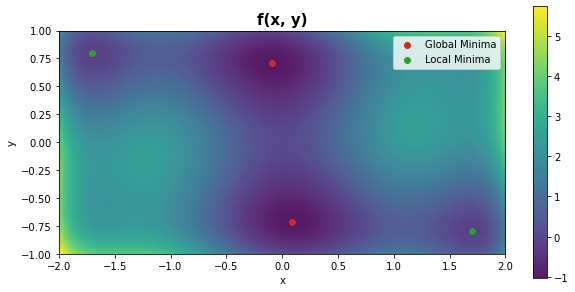

In [4]:
# PLOT AGAIN THE REGION WITH THE LOCAL AND GLOBAL MINIMA

plt.figure(figsize=(10, 5))
plt.imshow(z, extent=(-2, 2, -1, 1), cmap=cm.viridis, alpha=0.9, origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x, y)', fontweight = 'bold', fontsize = 15)
plt.colorbar();

plt.scatter(minima['x'][2:], minima['y'][2:], label = 'Global Minima', color='C3')
plt.scatter(minima['x'][:2], minima['y'][:2], label = 'Local Minima', color='C2')
plt.legend();



In [5]:
# STARTING POINT (0, 0)
print('Metod: Nelder-Mead')
solution_zero = optimize.minimize(f, [0, 0], method = 'Nelder-Mead')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

print('\nMetod: Powell')
solution_zero = optimize.minimize(f, [0, 0], method = 'Powell')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

print('\nMetod: CG')
solution_zero = optimize.minimize(f, [0, 0], method = 'CG')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

print('\nMetod: BFGS')
solution_zero = optimize.minimize(f, [0, 0], method = 'BFGS')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

print('\nMetod: TNC')
solution_zero = optimize.minimize(f, [0, 0], method = 'TNC')
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])

from scipy.optimize import basinhopping
print('\nMetod: basinhopping')
solution_zero = basinhopping(f, [0,0], stepsize=1) 
print('Solution:', solution_zero['x'])
print('Message:', solution_zero['message'])


Metod: Nelder-Mead
Solution: [-0.08985145  0.71266538]
Message: Optimization terminated successfully.

Metod: Powell
Solution: [-0.08984201  0.71265634]
Message: Optimization terminated successfully.

Metod: CG
Solution: [0. 0.]
Message: Optimization terminated successfully.

Metod: BFGS
Solution: [0. 0.]
Message: Optimization terminated successfully.

Metod: TNC
Solution: [0. 0.]
Message: Local minimum reached (|pg| ~= 0)

Metod: basinhopping
Solution: [ 0.08984202 -0.71265641]
Message: ['requested number of basinhopping iterations completed successfully']


For an initial guess of $(x, y) = (0, 0)$, some methods ('Nelder-Mead', 'Powell', 'basinhopping') are able to get the correct solution, while the others remain stucked in the starting point, even if the message says 'Optimization terminated successfully'. 

In [6]:
# LET'S TRY TO FIND THE GLOBAL MINIMA MANUALLY, WITHOUT HAVING AD IDEA OF A POSSIBLE GOOD STARTING POINT

initial_guess = [i for i in zip(np.random.uniform(-2, 2, 10), np.random.uniform(-1, 1, 10))]
solutions = [optimize.minimize(f, x0) for x0 in initial_guess]
idx = np.argmin([solution['fun'] for solution in solutions])
solution = solutions[idx]

print('Solution:', solution['x'])
print('Starting point: (x, y) =', list(initial_guess)[idx])
print('Message:', solution['message'])
print('Function value:', solution['fun'])


Solution: [-0.08984202  0.7126564 ]
Starting point: (x, y) = (-0.002464651009034924, 0.21760270855132613)
Message: Optimization terminated successfully.
Function value: -1.0316284534898768


In [7]:
# I WANT TO CHECK ALSO WHAT HAPPENS IF I SELECT A LARGER REGION

initial_guess = [i for i in zip(np.random.uniform(-20000, 20000, 10), np.random.uniform(-10000, 10000, 10))]
solutions = [optimize.minimize(f, x0) for x0 in initial_guess]
idx = np.argmin([solution['fun'] for solution in solutions])
solution = solutions[idx]

print('Solution:', solution['x'])
print('Starting point: (x, y) =', list(initial_guess)[idx])
print('Message:', solution['message'])
print('Function value:', solution['fun'])

Solution: [-0.08984204  0.7126564 ]
Starting point: (x, y) = (14340.98572921149, -1489.4817011435916)
Message: Optimization terminated successfully.
Function value: -1.0316284534898745


Notice I can still get a very good solution, even with a small number of random starting points. Moreover, the algorithm is able to converge to the good solution even if the starting point is very far from it. 

However, manually, without a prior knowledge on the possible positions of the minima, it is difficult to get both of them. Still, given the first one, I could try to find all the local minima in which the function has a value close to the one of the global minima found. 

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [8]:
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold', fontsize='15')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

In [9]:
# Data
months = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
Tmax = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Tmin = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

dataset = pd.DataFrame({'Month': months, 'T max': Tmax, 'T min': Tmin})
print('Dataset of temperatures:')
display(dataset)

# Suitable functions
import math as m
def f_sin(x, A, T, hshift, vshift):
    # I could also set the period = 12 ...
    return A*np.sin(2*m.pi/T*x+hshift)+vshift

def f_gauss(x, A, mu, std, vshift):
    return A*np.exp(-(x-mu)**2/(2*std**2))+vshift

# Fitting
## sine
popt_M_sin, pcov_M_sin = optimize.curve_fit(f_sin, np.arange(12), Tmax, p0=[10, 12, 0, 20])
popt_m_sin, pcov_m_sin = optimize.curve_fit(f_sin, np.arange(12), Tmin, p0=[60, 12, 0, -60])

pstd_M_sin = [np.sqrt(pcov_M_sin[i,i]) for i in np.arange(4)]
pstd_m_sin = [np.sqrt(pcov_m_sin[i,i]) for i in np.arange(4)]

params = [[i, j] for i, j in zip(popt_M_sin, popt_m_sin)]
params_errors = [[i, j] for i, j in zip(pstd_M_sin, pstd_m_sin)]

params_sin = pd.DataFrame({'A': params[0], 'Error (A)': params_errors[0],
           'T': params[1], 'Error (T)': params_errors[1], 
           'B': params[2], 'Error (B)': params_errors[2],
           'C': params[3], 'Error (C)': params_errors[3]}, index=['T max', 'T min'])

print('Sine fitting function parameters:')
display(params_sin)

## gauss
popt_M_gauss, pcov_M_gauss = optimize.curve_fit(f_gauss, range(12), Tmax, p0=[30, 10, 5, 20])
popt_m_gauss, pcov_m_gauss = optimize.curve_fit(f_gauss, range(12), Tmin, p0=[40, 10, 5, -60])

pstd_M_gauss = [np.sqrt(pcov_M_gauss[i,i]) for i in range(4)]
pstd_m_gauss = [np.sqrt(pcov_m_gauss[i,i]) for i in range(4)]

params = [[i, j] for i, j in zip(popt_M_gauss, popt_m_gauss)]
params_errors = [[i, j] for i, j in zip(pstd_M_gauss, pstd_m_gauss)]

params_gauss = pd.DataFrame({'A': params[0], 'Error (A)': params_errors[0],
           'mu': params[1], 'Error (mu)': params_errors[1], 
           'std': params[2], 'Error (std)': params_errors[2], 
           'B': params[2], 'Error (B)': params_errors[3]}, index=['T max', 'T min'])

print('Gaussian function parameters:')
display(params_gauss)


Dataset of temperatures:


,Month,T max,T min
0,Jan,17,-62
1,Feb,19,-59
2,Mar,21,-56
3,April,28,-46
4,May,33,-32
5,June,38,-18
6,July,37,-9
7,Aug,37,-13
8,Sept,31,-25
9,Oct,23,-46


Sine fitting function parameters:


,A,Error (A),T,Error (T),B,Error (B),C,Error (C)
T max,10.58170,0.410078,10.608574,0.379420,-1.818656,0.126022,27.949635,0.428249
T min,25.14962,1.314562,10.448975,0.400311,4.166084,0.143051,-36.712571,1.191052


Gaussian function parameters:


,A,Error (A),mu,Error (mu),std,Error (std),B,Error (B)
T max,23.092087,1.152655,5.735816,0.079468,2.294436,0.165960,2.294436,1.176540
T min,52.649290,1.403334,6.164526,0.047207,1.975900,0.075981,1.975900,1.188808


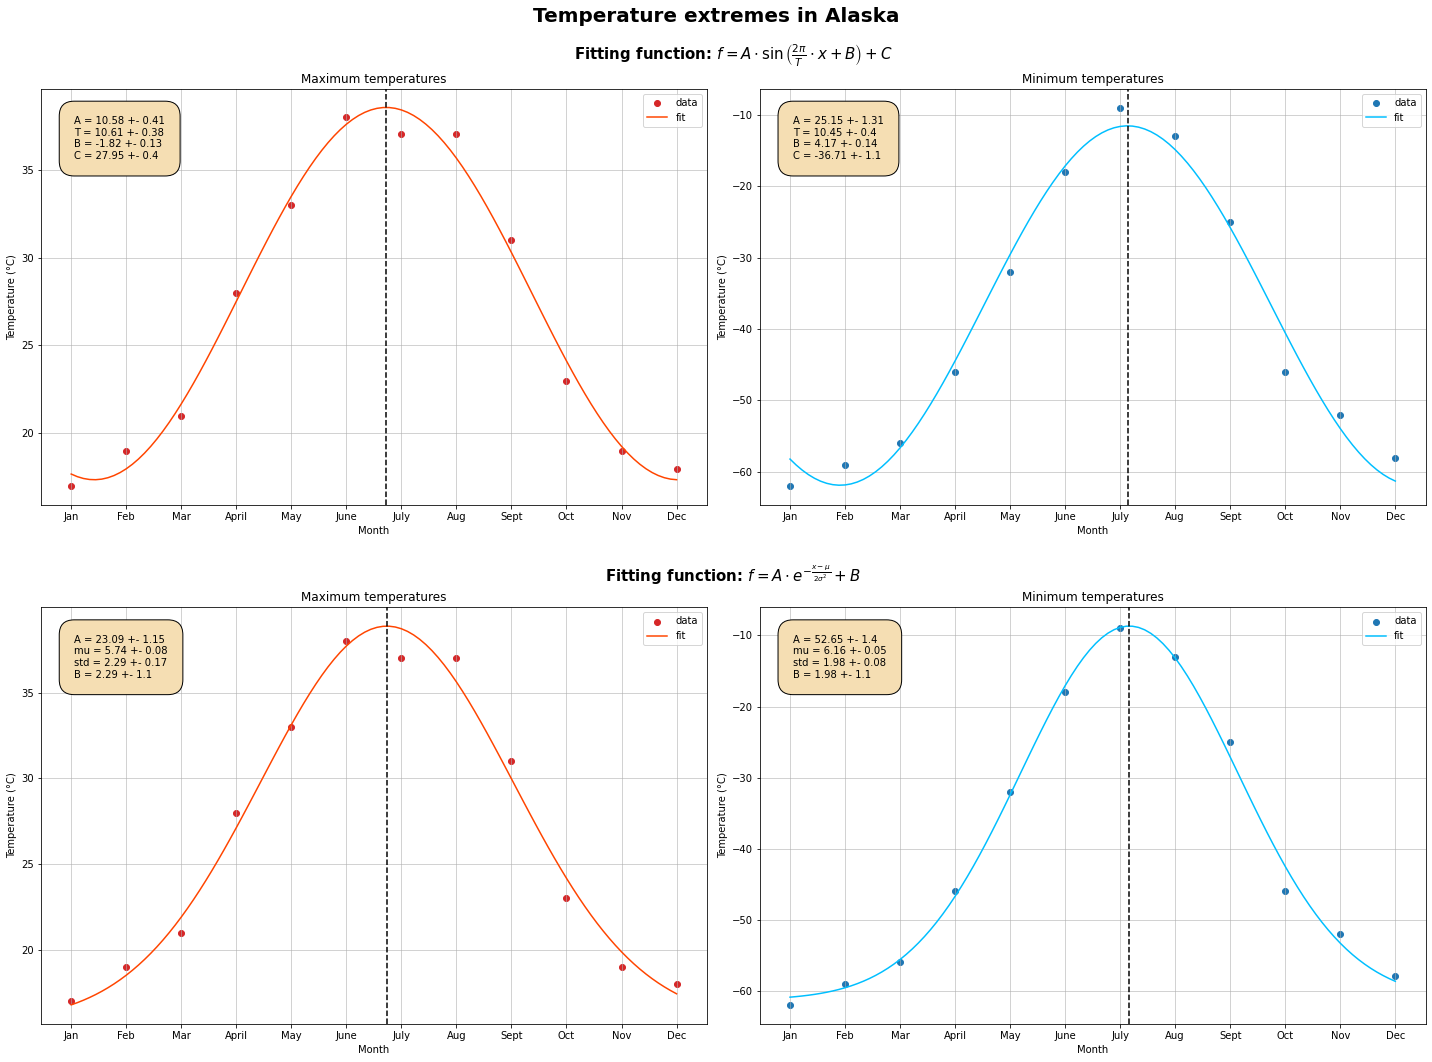

In [10]:
# Plot 
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Temperature extremes in Alaska', fontweight='bold', fontsize='20' )
grid = plt.GridSpec(2, 2)

## Data
for i in range(2):
    ax[i, 0].scatter(months, Tmax, color='C3', label='data')
    ax[i, 0].set_xlabel('Month')
    ax[i, 0].set_ylabel('Temperature (°C)')
    ax[i, 0].set_title('Maximum temperatures')

    ax[i, 1].scatter(months, Tmin, color='C0', label='data')
    ax[i, 1].set_xlabel('Month')
    ax[i, 1].set_ylabel('Temperature (°C)')
    ax[i, 1].set_title('Minimum temperatures')


## Fitting curves
x_temp = np.linspace(0, 11, 100)

### sine
ax[0, 0].plot(x_temp, f_sin(x_temp, *popt_M_sin), color='orangered', label='fit')
ax[0, 1].plot(x_temp, f_sin(x_temp, *popt_m_sin), color='deepskyblue', label='fit')
ax[0, 0].legend()
ax[0, 1].legend()

ax[0, 0].axvline(popt_M_sin[1]*(0.25-popt_M_sin[2]/(2*m.pi)), color='black', linestyle='--')
ax[0, 1].axvline(popt_m_sin[1]*(0.25-popt_m_sin[2]/(2*m.pi))+popt_m_sin[1], color='black', linestyle='--')

create_subtitle(fig, grid[0, ::], r'Fitting function: $f = A\cdot\sin\left(\frac{2\pi}{T}\cdot x + B\right)+C$')

### gauss
ax[1, 0].plot(x_temp, f_gauss(x_temp, *popt_M_gauss), color='orangered', label='fit')
ax[1, 1].plot(x_temp, f_gauss(x_temp, *popt_m_gauss), color='deepskyblue', label='fit')
ax[1, 0].legend()
ax[1, 1].legend()

ax[1, 0].axvline(popt_M_gauss[1], color='black', linestyle='--')
ax[1, 1].axvline(popt_m_gauss[1], color='black', linestyle='--')

create_subtitle(fig, grid[1, ::], r'Fitting function: $f = A\cdot e^{-\frac{x-\mu}{2\sigma^2}}+B$')

## Results
text_M_sin = ''
for i in range(0, 8, 2):
    text_M_sin += params_sin.columns[i] + ' = ' + str(round(params_sin.iloc[0, i], 2)) + ' +- ' + str(round(params_sin.iloc[0, i+1],2))+'\n'
text_m_sin = ''
for i in range(0, 8, 2):
    text_m_sin += params_sin.columns[i] + ' = ' + str(round(params_sin.iloc[1, i], 2)) + ' +- ' + str(round(params_sin.iloc[1, i+1],2))+'\n'
text_M_gauss = ''
for i in range(0, 8, 2):
    text_M_gauss += params_gauss.columns[i] + ' = ' + str(round(params_gauss.iloc[0, i], 2)) + ' +- ' + str(round(params_gauss.iloc[0, i+1],2))+'\n'
text_m_gauss = ''
for i in range(0, 8, 2):
    text_m_gauss += params_gauss.columns[i] + ' = ' + str(round(params_gauss.iloc[1, i], 2)) + ' +- ' + str(round(params_gauss.iloc[1, i+1],2))+'\n'
    
text_plot = [[text_M_sin[:-2], text_m_sin[:-2]], [text_M_gauss[:-2], text_m_gauss[:-2]]]

for i in range(2):
    for j in range(2):
        ax[i, j].text(0.05, 0.88, 
            s= text_plot[i][j],
            transform=ax[i,j].transAxes,
            bbox={'facecolor': 'wheat', 'alpha': 1, 'pad': 1.5, 'boxstyle':'round'},
            verticalalignment='center', 
            );
        
        ax[i, j].grid(alpha=0.7)

## Settings        
fig.tight_layout()  
fig.set_facecolor('w')


Looking at these figures, both fits seem to be reasonable and apparently both functions fit very well the data. 

Let us extend these results outside the given time interval and see what happens.

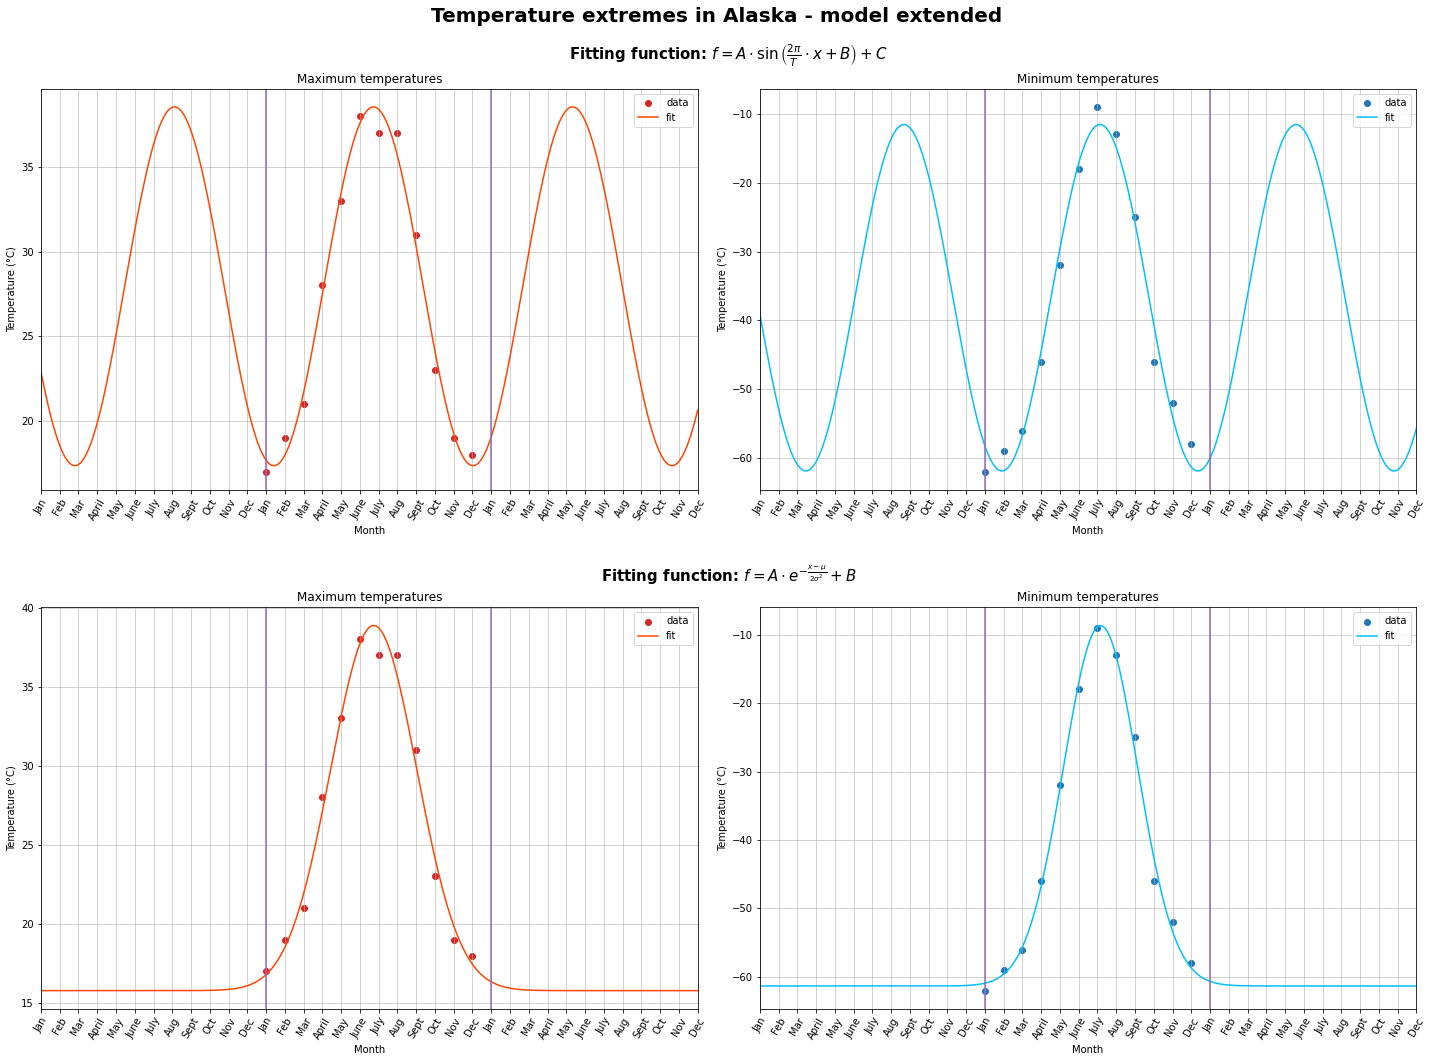

In [11]:
# New Plot 
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

fig.suptitle('Temperature extremes in Alaska - model extended', fontweight='bold', fontsize='20' )
grid = plt.GridSpec(2, 2)

## Data
for i in range(2):
    ax[i, 0].scatter(months, Tmax, color='C3', label='data')
    ax[i, 0].set_xlabel('Month')
    ax[i, 0].set_ylabel('Temperature (°C)')
    ax[i, 0].set_title('Maximum temperatures')

    ax[i, 1].scatter(months, Tmin, color='C0', label='data')
    ax[i, 1].set_xlabel('Month')
    ax[i, 1].set_ylabel('Temperature (°C)')
    ax[i, 1].set_title('Minimum temperatures')


## Fitting curves
x_temp = np.linspace(-12, 23, 300)

### sine
ax[0, 0].plot(x_temp, f_sin(x_temp, *popt_M_sin), color='orangered', label='fit')
ax[0, 1].plot(x_temp, f_sin(x_temp, *popt_m_sin), color='deepskyblue', label='fit')
ax[0, 0].legend()
ax[0, 1].legend()

create_subtitle(fig, grid[0, ::], r'Fitting function: $f = A\cdot\sin\left(\frac{2\pi}{T}\cdot x+B\right)+C$')

### gauss
ax[1, 0].plot(x_temp, f_gauss(x_temp, *popt_M_gauss), color='orangered', label='fit')
ax[1, 1].plot(x_temp, f_gauss(x_temp, *popt_m_gauss), color='deepskyblue', label='fit')
ax[1, 0].legend()
ax[1, 1].legend()

create_subtitle(fig, grid[1, ::], r'Fitting function: $f = A\cdot e^{-\frac{x-\mu}{2\sigma^2}}+B$')

## Results
for i in range(2):
    for j in range(2):
        # ax[i, j].text(0.05, 0.88, 
        #     s= text_plot[i][j],
        #     transform=ax[i,j].transAxes,
        #     bbox={'facecolor': 'wheat', 'alpha': 1, 'pad': 1.5, 'boxstyle':'round'},
        #     verticalalignment='center', 
        #     );
        
        ax[i, j].grid(alpha=0.7)
        ax[i, j].xaxis.set_tick_params(rotation=60)
        ax[i, j].set_xticks(ticks=range(-12, 24))
        ax[i, j].set_xticklabels(months*3)
        ax[i, j].set_xlim(-12, 23)
        ax[i, j].axvline(0, color='C4')
        ax[i, j].axvline(12, color='C4')

## Settings        
fig.tight_layout()  
fig.set_facecolor('w')

When we extend the 2 models outside the given interval, some critical issues appear. First of all, the gaussian model extends very badly outside the single year interval. The function is almost constant before and after the given year, so this model does not seem a good solution. 

The sine function partially solves this problem. However, it still has some critical aspects, since the both the amplitude and the period are constant during the years, so we are not considering possible variations of this parameters on a larger scale. 

In conclusion, it is almost impossible to get a solution that is relevant and extends well also outside the given interval, due to the fact that with the given dataset we have no knowledge about what happens on a longer timescale. On the other hand, if we consider a single year, both solutions fit well the data, but it is very difficult to extract good informations from them. 

Anyway, let us perform a goodness-of-fit test

In [12]:
# GOODNESS OF FIT

months_num = range(0, 12)

## sine
residuals = Tmax - f_sin(months_num, *popt_M_sin)
SSR = np.sum(residuals**2)
TSS = np.sum((Tmax-np.mean(Tmax))**2)
R2_sM = 1 - (SSR/TSS)

residuals = Tmin - f_sin(months_num, *popt_m_sin)
SSR = np.sum(residuals**2)
TSS = np.sum((Tmin-np.mean(Tmin))**2)
R2_sm = 1 - (SSR/TSS)

## gauss
residuals = Tmax - f_gauss(months_num, *popt_M_gauss)
SSR = np.sum(residuals**2)
TSS = np.sum((Tmax-np.mean(Tmax))**2)
R2_gM = 1 - (SSR/TSS)

residuals = Tmin - f_gauss(months_num, *popt_m_gauss)
SSR = np.sum(residuals**2)
TSS = np.sum((Tmin-np.mean(Tmin))**2)
R2_gm = 1 - (SSR/TSS)

## results 
print('Goodness of fit: look at R2')
print('\nSine \nTmax: %.4f \nTmin: %.4f' %(R2_sM, R2_sm))
print('\nGaus \nTmax: %.4f \nTmin: %.4f' %(R2_gM, R2_gm))
print('\nThe results seem good from this test')

Goodness of fit: look at R2

Sine 
Tmax: 0.9883 
Tmin: 0.9787

Gaus 
Tmax: 0.9859 
Tmin: 0.9946

The results seem good from this test


In [13]:
# Time offset for min and max temperatures
## sine
offset_Tmax = params_sin['T'][0]*(0.25-params_sin['B'][0]/(2*m.pi)) 
offset_Tmin = params_sin['T'][1]*(0.25-params_sin['B'][1]/(2*m.pi))+params_sin['T'][1]
error_Tmax = (params_sin['Error (T)'][0]*params_sin['Error (B)'][0])
error_Tmin = (params_sin['Error (T)'][1]*params_sin['Error (B)'][1])

print('Time offset using sine for T_max: %.2f+-%.2f' %(offset_Tmax, error_Tmax))
print('Time offset using sine for T_min: %.2f+-%.2f' %(offset_Tmin, error_Tmin))

agreement_sin = abs(offset_Tmax-offset_Tmin)/np.sqrt(error_Tmax**2+error_Tmin**2)
print('Agreement between them: %.2f' %agreement_sin)

## gauss
print('\nTime offset using gaus for T_max: %.2f+-%.2f' %(params_gauss['mu'][0], params_gauss['Error (mu)'][0]))
print('Time offset using gaus for T_min: %.2f+-%.2f' %(params_gauss['mu'][1], params_gauss['Error (mu)'][1]))

agreement_gauss = abs(params_gauss['mu'][0]-params_gauss['mu'][1])/np.sqrt(params_gauss['Error (mu)'][0]**2+params_gauss['Error (mu)'][1]**2)
print('Agreement between them: %.2f' %agreement_gauss)

Time offset using sine for T_max: 5.72+-0.05
Time offset using sine for T_min: 6.13+-0.06
Agreement between them: 5.50

Time offset using gaus for T_max: 5.74+-0.08
Time offset using gaus for T_min: 6.16+-0.05
Agreement between them: 4.64


With both sine and gaussian functions, time offset for min and max temperatures are not the same within the fit accuracy. 

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


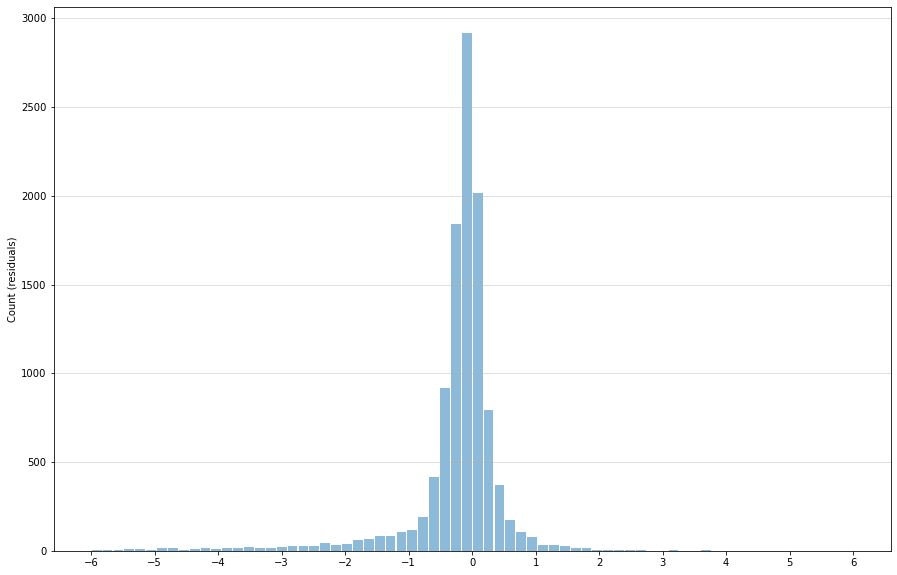

In [14]:
import math as m
import pickle
from matplotlib.ticker import MultipleLocator

# Reading file
filename = '/Users/Nicola/data/residuals_261.pkl'

with open(filename, 'rb') as f:
    data = pickle.load(f).item()
    
dataframe = pd.DataFrame(data)
display(dataframe.head())

residuals = dataframe['residuals']

# Suitable functions
def gauss(x, A, mu, std):
    return A*np.exp(-(x-mu)**2/(2*std**2))
def cauchy(x, A, x0, gamma):
    return A*gamma**2/((x-x0)**2+gamma**2)

# Histogram
fig, ax = plt.subplots(figsize=(15, 10))
n, bins, _= ax.hist(residuals, bins=70, alpha=0.5, color='C0', range=(-6, 6), rwidth=0.9) # restricted range: (-6, 6)

bin_centers = 0.5*(bins[1:]+bins[:-1])
poisson_unc = np.sqrt(n)

ax.set_ylabel('Count (residuals)')
ax.grid(axis='y', alpha=0.5)
ax.xaxis.set_major_locator(MultipleLocator(1))


NORMAL DISTRIBUTION
Number of degrees of freedom: 23
chi^2 =  1306.7939769531145
p-value: 0.000 , Is the fit satisfactory? NO

CAUCHY DISTRIBUTION
Number of degrees of freedom: 23
chi^2 =  685.6594552004394
p-value: 0.000 , Is the fit satisfactory? NO


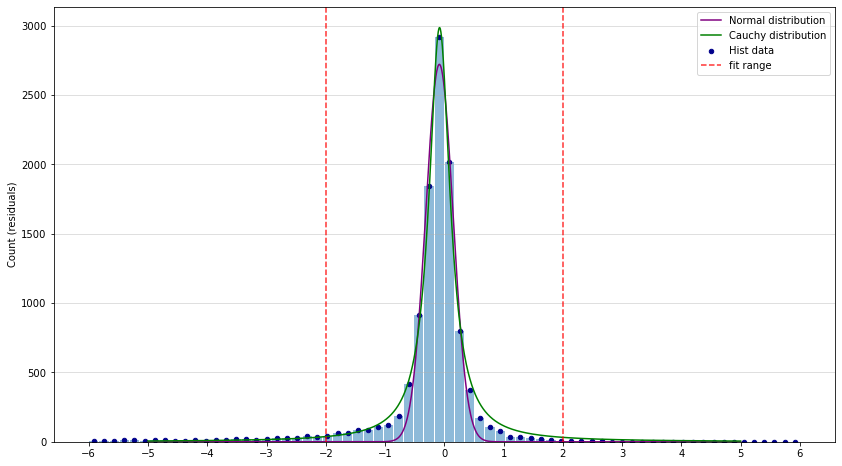

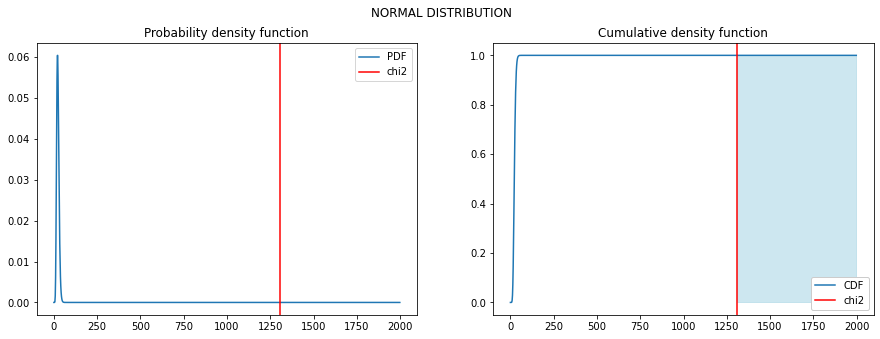

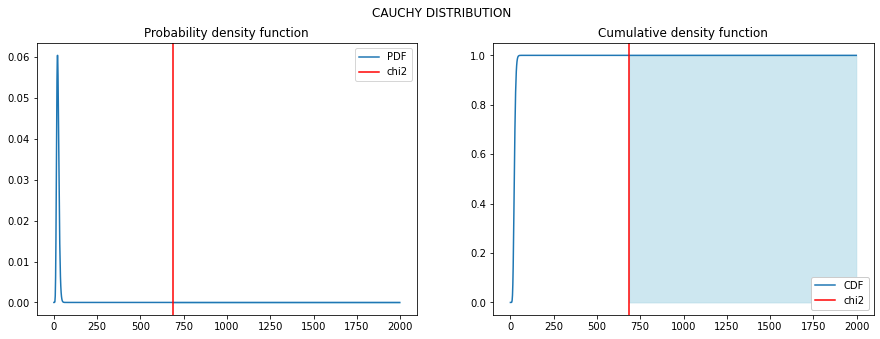

In [15]:
# Restrict to the range (-2, 2) for better results
idx = (bin_centers<2) & (bin_centers>-2)
x_hist = bin_centers[idx]
n_hist = n[idx]
errors = poisson_unc[idx]

# Fit
popt_gauss, pcov_gauss = optimize.curve_fit(gauss, x_hist, n_hist, p0=[1000, 0, 10])
popt_cauchy, pcov_cauchy = optimize.curve_fit(cauchy, x_hist, n_hist, p0=[1000, 0, 10])

# Plot the fitted histogram
fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(residuals, bins=70, alpha=0.5, color='C0', range=(-6, 6), rwidth=0.9) # restricted range: (-6, 6)

ax.set_ylabel('Count (residuals)')
ax.grid(axis='y', alpha=0.5)
ax.xaxis.set_major_locator(MultipleLocator(1))

x_plot = np.linspace(-5, 5, 2000)
ax.plot(x_plot, gauss(x_plot, *popt_gauss), color='purple', label='Normal distribution')
ax.plot(x_plot, cauchy(x_plot, *popt_cauchy), color='green', label='Cauchy distribution')

# Plot the considered points
ax.scatter(bin_centers, n, s=20, label='Hist data', color='darkblue')
ax.axvline(-2, color='red', alpha=0.8, linestyle='--', label='fit range')
ax.axvline(2, color='red', alpha=0.8, linestyle='--')
ax.legend();

# Goodness-of-fit test (p-value)
from scipy import stats

def pvalue(xsamples, ysamples, fun, sigmay, alpha_value=0.05, args=None, verbose=False, plot=False, plot_title = ''):
    ndof = len(ysamples)-1
    if verbose: print('Number of degrees of freedom:', ndof)
    
    chi2 = np.sum(((ysamples - fun(xsamples, *args))**2) / sigmay**2)
    if verbose: print('chi^2 = ', chi2)
    
    pvalue = 1. - stats.chi2.cdf(chi2, ndof)
    if verbose: print("p-value: %.3f" % pvalue, ", Is the fit satisfactory?", "YES" if pvalue >= alpha_value else "NO")
    
    if plot:
        p = np.arange(0, 2000, 2)
        y_pdf = stats.chi2.pdf(p, df=ndof)
        y_cdf = stats.chi2.cdf(p, df=ndof)
        
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
        ax0.plot(p, y_pdf, label='PDF')
        ax0.fill_between(p, y_pdf, where=(p > chi2), color='lightblue', alpha=0.6)
        ax0.axvline(chi2, color='r', label='chi2')
        ax0.set_title('Probability density function')
        ax0.legend()
        ax1.plot(p, y_cdf, label='CDF')
        ax1.fill_between(p, y_cdf, where=(p > chi2), color='lightblue', alpha=0.6)
        ax1.axvline(chi2, color='r', label='chi2')
        ax1.set_title('Cumulative density function')
        ax1.legend(framealpha=1)
        if plot_title != '': fig.suptitle(plot_title)
    return pvalue

print('NORMAL DISTRIBUTION')
pvalue(x_hist, n_hist, gauss, errors, args=popt_gauss, verbose=True, plot=True, plot_title='NORMAL DISTRIBUTION')
print('\nCAUCHY DISTRIBUTION')
pvalue(x_hist, n_hist, cauchy, errors, args=popt_cauchy, verbose=True, plot=True, plot_title='CAUCHY DISTRIBUTION');


The p-value is too small (approximately zero), so it is not satisfactory. This is caused by the fact that $\chi^2$ is very large, because the counts have very large values (e.g. 2000), so the SSR becomes very big, even if the residuals are divided by $n_i$, the Poisson uncertainty squared, so somehow normalized.  

Let's try to normalize the counts (height of the bins between 0 and 1) and see what happens.

NORMAL DISTRIBUTION
Number of degrees of freedom: 23
chi^2 =  0.44799628632483746
p-value: 1.000 , Is the fit satisfactory? YES

CAUCHY DISTRIBUTION
Number of degrees of freedom: 23
chi^2 =  0.23505592728046198
p-value: 1.000 , Is the fit satisfactory? YES


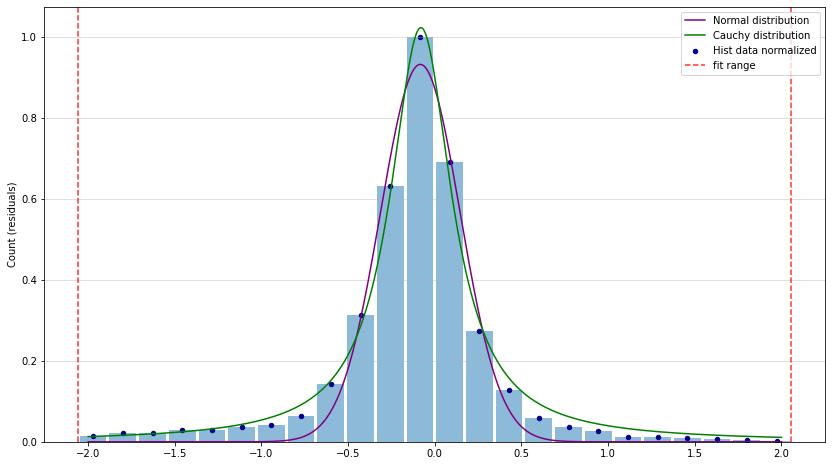

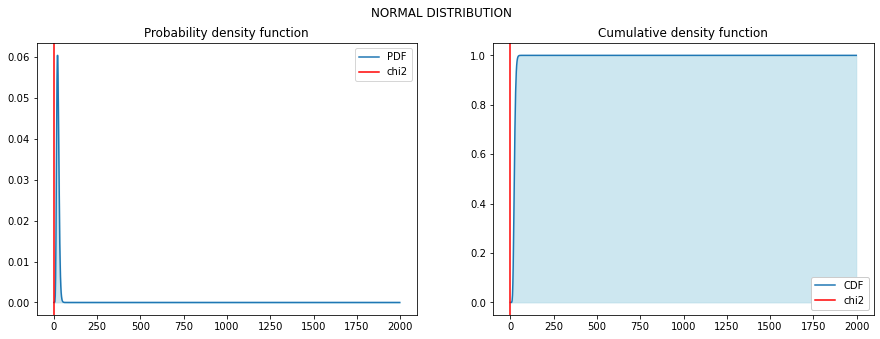

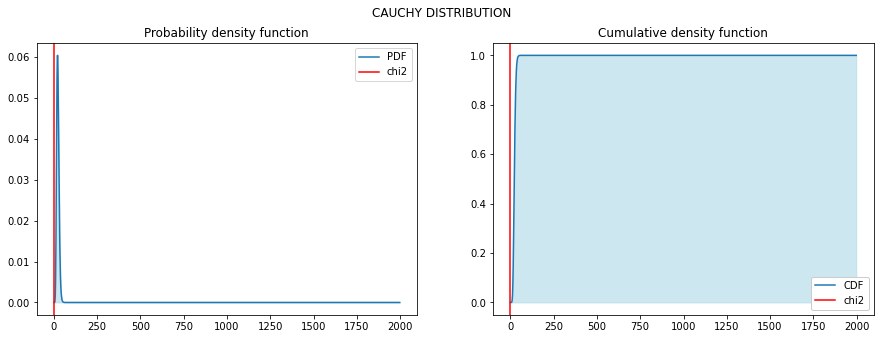

In [16]:
# Normalization (data between 0 and 1), still considering only to the range (-2, 2) for better results
n_norm = n_hist/np.max(n_hist)
errors = np.sqrt(n_norm)
bins_norm = bins[(bins<=2.1)&(bins>=-2.1)]

# Fit
popt_gauss, pcov_gauss = optimize.curve_fit(gauss, x_hist, n_norm, p0=[1, 0, 10])
popt_cauchy, pcov_cauchy = optimize.curve_fit(cauchy, x_hist, n_norm, p0=[1, 0, 10])

# Plot the fitted histogram
fig, ax = plt.subplots(figsize=(14, 8))
ax.hist(x_hist, weights=n_norm, bins=bins_norm, alpha=0.5, color='C0', rwidth=0.9) 

ax.set_ylabel('Count (residuals)')
ax.grid(axis='y', alpha=0.5)
ax.xaxis.set_major_locator(MultipleLocator(0.5))

x_plot = np.linspace(-2, 2, 2000)
ax.plot(x_plot, gauss(x_plot, *popt_gauss), color='purple', label='Normal distribution')
ax.plot(x_plot, cauchy(x_plot, *popt_cauchy), color='green', label='Cauchy distribution')

# Plot the considered points
ax.scatter(x_hist, n_norm, s=20, label='Hist data normalized', color='darkblue')
ax.axvline(bins_norm[0], color='red', alpha=0.8, linestyle='--', label='fit range')
ax.axvline(bins_norm[-1], color='red', alpha=0.8, linestyle='--')
ax.legend();

# Goodness-of-fit test
print('NORMAL DISTRIBUTION')
pvalue(x_hist, n_norm, gauss, errors, args=popt_gauss, verbose=True, plot=True, plot_title='NORMAL DISTRIBUTION')
print('\nCAUCHY DISTRIBUTION')
pvalue(x_hist, n_norm, cauchy, errors, args=popt_cauchy, verbose=True, plot=True, plot_title='CAUCHY DISTRIBUTION');


With the normalization, both the fitting functions lead to a satisfactory p-value, very close to $1!!!$ This confirms the previous hypotesis that such a big error was mostly due to the "unit of measure" of the counts.  

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(t)$, which has 1 more parameter than $f(t)$.
$$g(t) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(t)$ and $g(t)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [17]:
# FITTING FUNCTIONS

def f(t, a, b, c):
    return a*np.cos(2*m.pi*t+b)+c

def g(t, a, b, c, d):
    return a*np.cos(2*m.pi*b*t+c)+d

,time,temperature
0,2008.00274,-2.94444
1,2008.00548,-2.66667
2,2008.00821,-2.66667
3,2008.01095,-2.00000
4,2008.01369,-1.94444
...,...,...
1454,2011.98836,3.44444
1455,2011.99110,1.27778
1456,2011.99384,2.88889
1457,2011.99658,1.83333


f best-fit parameters:
a = -9.96 +- 0.13
b = -0.23 +- 0.01
c = 9.26 +- 0.09

Overall average temperature in Munich: 8.94°C
Overall average temperature in Munich in the range 2008 to 2012: 9.26°C
Overall average temperature in Munich in the range 2008 to 2012, predicted by the model: 9.26°C

Typical daily average values predicted by the model for the coldest and hottest time of year:
T coldest time of year = -0.70°C
T hottest time of year = 19.22°C


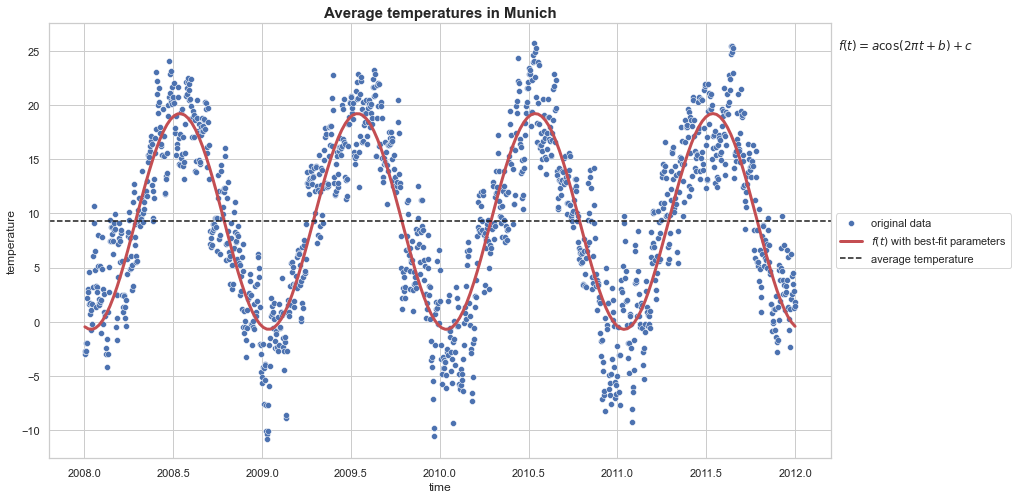

In [52]:
import seaborn as sns
sns.set(style="whitegrid") 

# Import the data
data = pd.DataFrame(np.loadtxt("/Users/Nicola/data/munich_temperatures_average_with_bad_data.txt"), columns=['time', 'temperature'])
# display(data)

# Reduce the data in the range 2008-2012 and remove anomalies (wrong values)
TMunich = data[(data['time']<=2012) & (data['time']>=2008) & (abs(data['temperature']<80))].copy().reset_index(drop=True)
display(TMunich)

# Plot of the data and the best-fit model in the range 2008 to 2012
fig, ax0 = plt.subplots(figsize=(14, 8))
sns.scatterplot(ax=ax0, data=TMunich, x='time', y='temperature', color='C0', label='original data')

# Fit f
popt_f, pcov_f = optimize.curve_fit(f, TMunich['time'], TMunich['temperature'], p0=[15, 0.5, 5])

print('f best-fit parameters:')
print('a = %.2f +- %.2f' %(popt_f[0], np.sqrt(pcov_f[0,0])))
print('b = %.2f +- %.2f' %(popt_f[1], np.sqrt(pcov_f[1,1])))
print('c = %.2f +- %.2f' %(popt_f[2], np.sqrt(pcov_f[2,2])))

# Plot the fitting curve f
x_plot = np.linspace(TMunich.iloc[0, 0], TMunich.iloc[-1, 0], 200)
ax0.plot(x_plot, f(x_plot, *popt_f), color='C3', linewidth=3, label=r'$f(t)$ with best-fit parameters')
ax0.set_title('Average temperatures in Munich', fontweight='bold', fontsize=15)

ax0.text(1.01, 0.95,
            s= r'$f(t) = a \cos(2\pi t + b)+c$',
            transform=ax0.transAxes,
            verticalalignment='center', 
            );

# Average temperature
print('\nOverall average temperature in Munich: %.2f°C' %data['temperature'].mean())
average_T = TMunich['temperature'].mean()
print('Overall average temperature in Munich in the range 2008 to 2012: %.2f°C' %average_T)
print('Overall average temperature in Munich in the range 2008 to 2012, predicted by the model: %.2f°C' %popt_f[2])

# Plot the mean
ax0.axhline(average_T, color='k', label='average temperature', linestyle='--')

# Typical daily average values predicted by the model for the coldest and hottest time of year
T_cold = popt_f[0] + popt_f[2]
T_hot = -popt_f[0] + popt_f[2]

print('\nTypical daily average values predicted by the model for the coldest and hottest time of year:')
print('T coldest time of year = %.2f°C' %T_cold)
print('T hottest time of year = %.2f°C' %T_hot)

# Legend
ax0.legend(bbox_to_anchor=(1, 0.5), loc='center left');


**What is the meaning of the $b$ parameter?** <br>
$b$ causes a horizontal shift of the cosine function $y=a\cdot\cos{(2\pi t)}+c$, so of the temperature distribution. It is an important parameter, as it guaratees a correct horizontal displacement of the maximum and the minimum during the year. 

**What physical sense does it have?** <br>
Since $a<0$, $-\frac{b}{2\pi} \simeq 0.037 $ represents the time offset for the minimum temperature with respect to 01/01 of each year. Indeed, being $y_i \in \mathbb{N}$ the 01/01 of a general year,
$$
f(t)|_{t = y_i -\frac{b}{2\pi}} = a\cdot\cos{\left[2\pi \cdot \left(y_i-\frac{b}{2\pi}\right) +b\right]} +c = a+c
$$

and it is the minimum since $a<0$.

g best-fit parameters:
a = -9.96 +- 0.13
b = 1.00 +- 0.00
c = -3.94 +- 23.79
d = 9.27 +- 0.10

Typical daily average values predicted by the model for the coldest and hottest time of year:
T coldest time of year = 19.23°C
T hottest time of year = -0.70°C


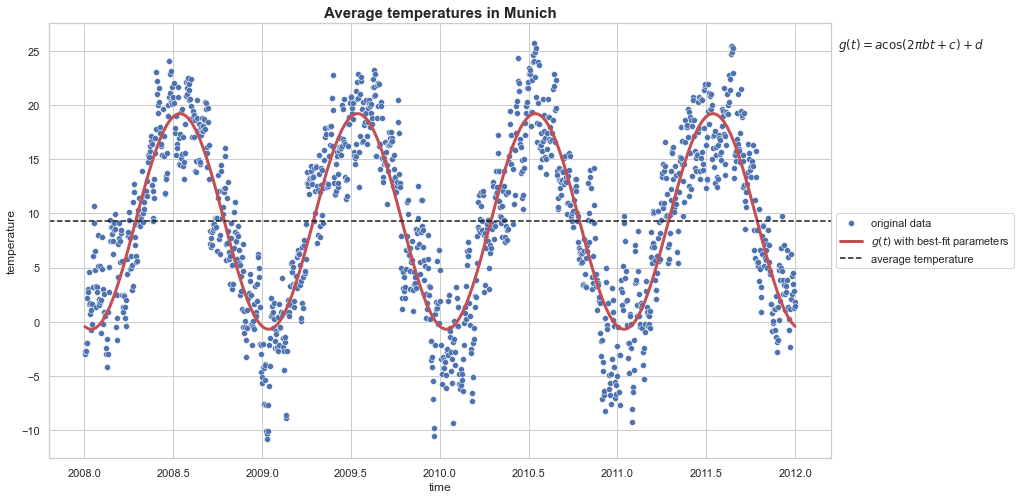

In [27]:
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.scatterplot(ax=ax1, data=TMunich, x='time', y='temperature', color='C0', label='original data')

# Fit g
popt_g, pcov_g = optimize.curve_fit(g, TMunich['time'], TMunich['temperature'], p0=[15, 1, 0.5, 5])
print('g best-fit parameters:')

print('a = %.2f +- %.2f' %(popt_g[0], np.sqrt(pcov_g[0,0])))
print('b = %.2f +- %.2f' %(popt_g[1], np.sqrt(pcov_g[1,1])))
print('c = %.2f +- %.2f' %(popt_g[2], np.sqrt(pcov_g[2,2])))
print('d = %.2f +- %.2f' %(popt_g[3], np.sqrt(pcov_g[3,3])))

# Plot the fitting curve g
ax1.plot(x_plot, g(x_plot, *popt_g), color='C3', linewidth=3, label=r'$g(t)$ with best-fit parameters')
ax1.set_title('Average temperatures in Munich', fontweight='bold', fontsize=15)

ax1.text(1.01, 0.95,
            s= r'$g(t) = a \cos(2\pi b t + c)+d$',
            transform=ax1.transAxes,
            verticalalignment='center', 
            );

# Plot the mean
ax1.axhline(average_T, color='k', label='average temperature', linestyle='--')
print('Overall average temperature in Munich in the range 2008 to 2012, predicted by the model: %.2f°C' %popt_f[3])

# Legends
ax1.legend(bbox_to_anchor=(1, 0.5), loc='center left')

# Typical daily average values predicted by the model for the coldest and hottest time of year
T_cold = popt_g[0] + popt_g[3]
T_hot = -popt_g[0] + popt_g[3]

print('\nTypical daily average values predicted by the model for the coldest and hottest time of year:')
print('T coldest time of year = %.2f°C' %T_cold)
print('T hottest time of year = %.2f°C' %T_hot)

In [58]:
# RSS (Residual Sum of Squares)
f_residuals = TMunich['temperature'] - f(TMunich['time'], *popt_f)
RSS_f = np.sum(f_residuals**2)

g_residuals = TMunich['temperature'] - g(TMunich['time'], *popt_g)
RSS_g = np.sum(g_residuals**2)

print('RSS (Residual Sum of Squares) \n--> f(t): %.2f \n--> g(t): %.2f' %(RSS_f, RSS_g))

# Fisher F-test
# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("\nCL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

ndof_f = 3-1 # n of parameters - 1
ndof_g = 4-1 # n of parameters - 1
N = TMunich.shape[0]
cl_f_vs_g = Ftest(RSS_f, RSS_g, ndof_f, ndof_g, N, verbose=True)

RSS (Residual Sum of Squares) 
--> f(t): 18669.52 
--> g(t): 18669.23

CL: 0.880 , additional parameter necessary: NO


Since $CL > 10\%$, the simpler function is sufficient and the additional parameter is not necessary. I expected this because the additional parameter (called $b$ in the function $g$) does not impact on the best-fit model. Indeed it is equal to 1, which is the same value we decided to set in the simpler model ($f$).